In [ ]:
# Rachuri Tarun
# BL.EN.U4AIE21109

In [14]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


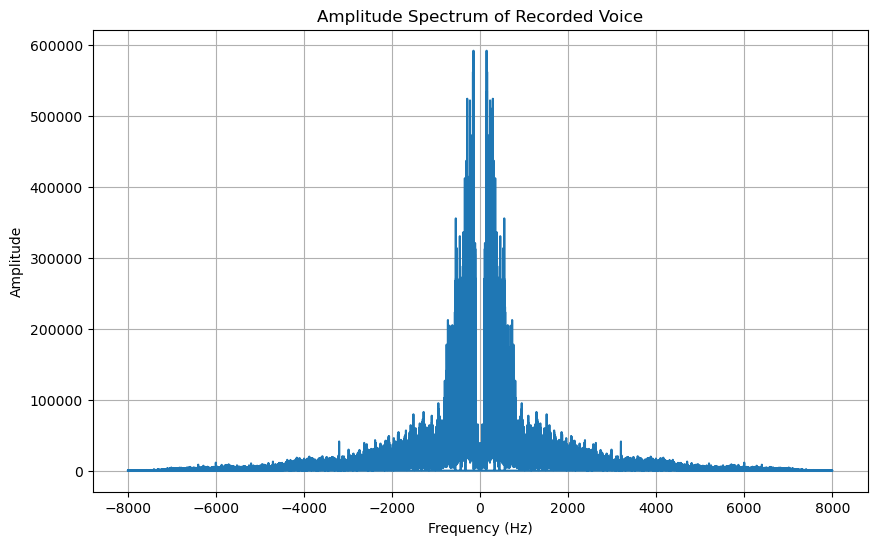

Playing Original Audio...
Press Enter to continue...
Playing Reconstructed Audio...


In [15]:
#A1

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from pydub import AudioSegment
import os

file_path = r"C:\Users\Tarun\Documents\Sound Recordings\STATEMENT.wav"
fs, voice_signal = wavfile.read(file_path)

# Fourier Transform
frequency_spectrum = np.fft.fft(voice_signal)

# Extract the amplitude part of the spectral components
amplitude_spectrum = np.abs(frequency_spectrum)

# amplitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(np.fft.fftfreq(len(voice_signal), 1/fs), amplitude_spectrum)
plt.title('Amplitude Spectrum of Recorded Voice')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Inverse Transform
reconstructed_signal = np.fft.ifft(frequency_spectrum).real.astype(np.int16)

# Save the original and reconstructed signals to temporary files
original_tempfile = "original_temp.wav"
reconstructed_tempfile = "reconstructed_temp.wav"

original_audio = AudioSegment(voice_signal.tobytes(), frame_rate=fs, sample_width=2, channels=1)
reconstructed_audio = AudioSegment(reconstructed_signal.tobytes(), frame_rate=fs, sample_width=2, channels=1)

# Export AudioSegment objects to temporary files
original_audio.export(original_tempfile, format="wav")
reconstructed_audio.export(reconstructed_tempfile, format="wav")

# Playing original and reconstructed signals
print("Playing Original Audio...")
os.system(f"start {original_tempfile}")

input("Press Enter to continue...")

print("Playing Reconstructed Audio...")
os.system(f"start {reconstructed_tempfile}")

# Removing temporary files
os.unlink(original_tempfile)
os.unlink(reconstructed_tempfile)


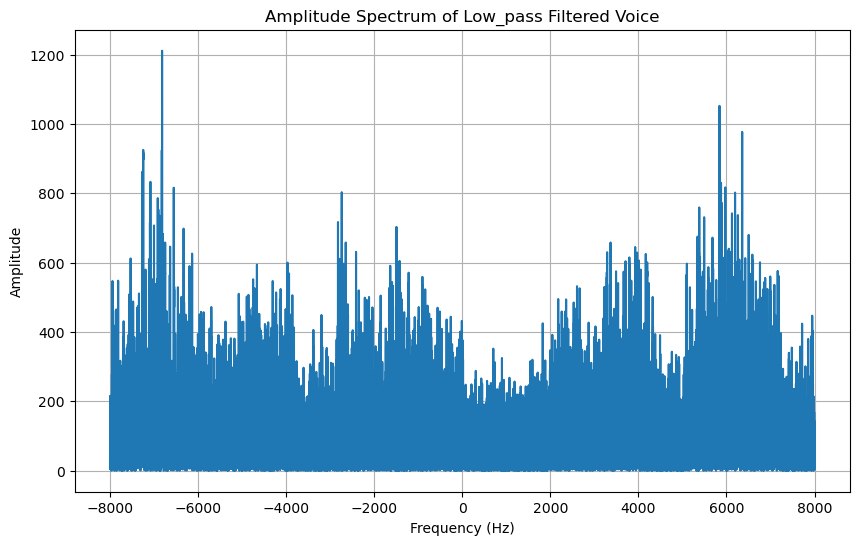

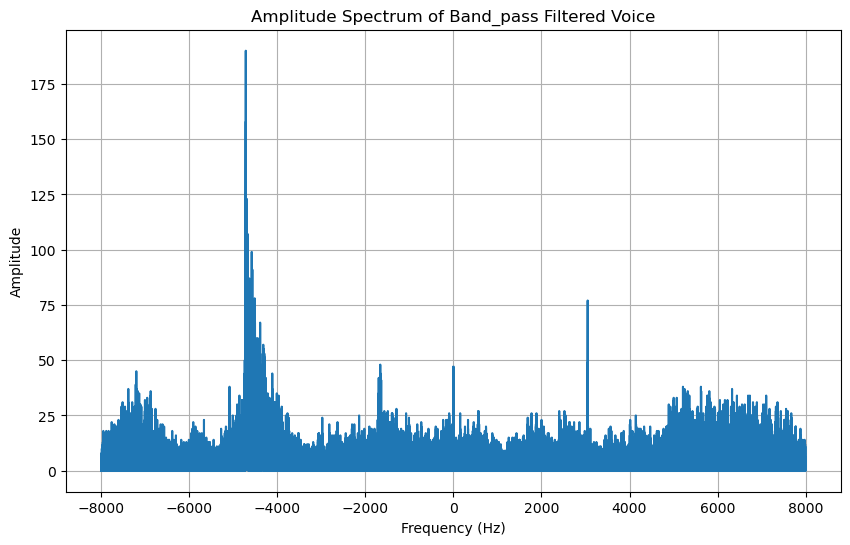

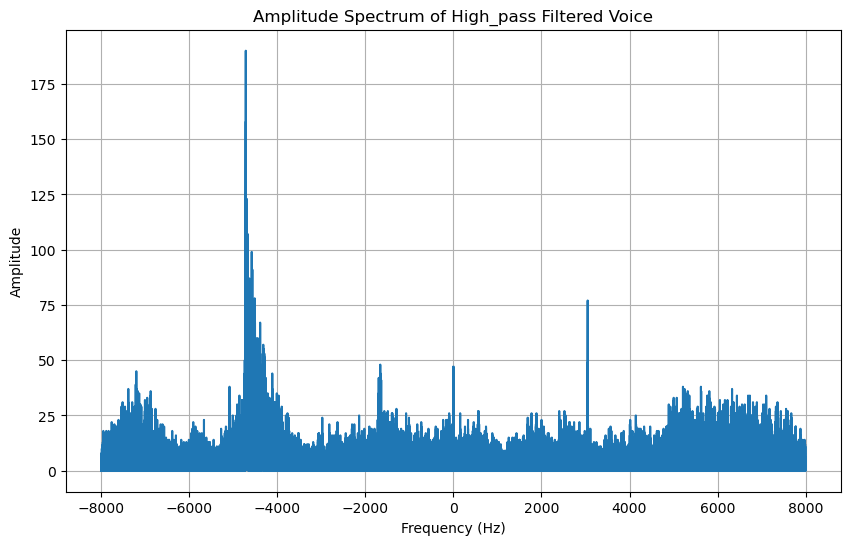

In [17]:
#A2

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from pydub import AudioSegment
import tempfile
import os

file_path = r"C:\Users\Tarun\Documents\Sound Recordings\STATEMENT.wav"
fs, voice_signal = wavfile.read(file_path)

# Fourier Transform
frequency_spectrum = np.fft.fft(voice_signal)

# Apply rectangular window for low-pass, band-pass, and high-pass filtering
def apply_filter(frequency_spectrum, filter_type):
    # Define filter window
    window_size = len(frequency_spectrum)
    if filter_type == 'low_pass':
        window = np.ones(window_size)
    elif filter_type == 'band_pass':
        window = np.concatenate((np.zeros(window_size//4), np.ones(window_size//2), np.zeros(window_size//4)))
    elif filter_type == 'high_pass':
        window = np.zeros(window_size)
        window[window_size//4:-window_size//4] = 1

    # Apply the filter
    filtered_spectrum = frequency_spectrum * window

    # Inverse Transform
    filtered_signal = np.fft.ifft(filtered_spectrum).real.astype(np.int16)

    return filtered_signal

# Apply filters and listen to the results
filter_types = ['low_pass', 'band_pass', 'high_pass']

for filter_type in filter_types:
    filtered_spectrum = apply_filter(frequency_spectrum, filter_type)
    
    # Ploting the amplitude spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(np.fft.fftfreq(len(voice_signal), 1/fs), np.abs(filtered_spectrum))
    plt.title(f'Amplitude Spectrum of {filter_type.capitalize()} Filtered Voice')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

    # Playing the filtered audio
    temp_filename = "filtered_temp.wav"
    wavfile.write(temp_filename, fs, filtered_spectrum)
    os.system(f"start {temp_filename}")
    os.remove(temp_filename)  

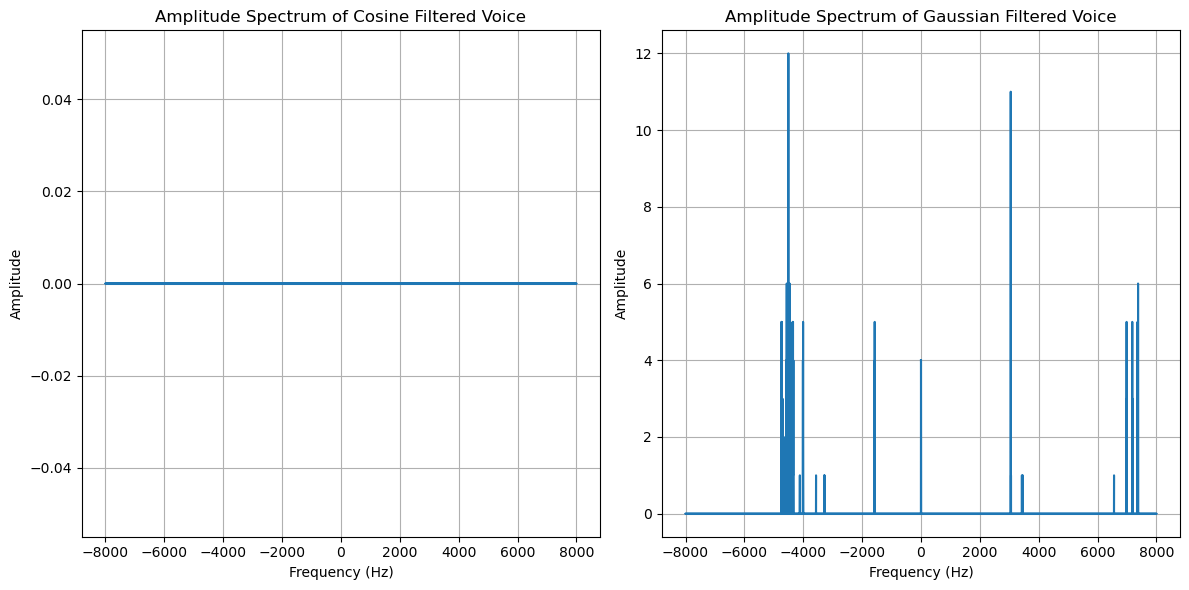

Playing Cosine Filtered Audio...
Press Enter to continue...
Playing Gaussian Filtered Audio...


In [18]:
# A3

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from pydub import AudioSegment
import tempfile
import os

file_path = r"C:\Users\Tarun\Documents\Sound Recordings\STATEMENT.wav"
fs, voice_signal = wavfile.read(file_path)

# Fourier Transform
frequency_spectrum = np.fft.fft(voice_signal)

# Apply cosine or Gaussian filters
def apply_cosine_filter(frequency_spectrum):
    # Create a cosine filter
    window_size = len(frequency_spectrum)
    cosine_window = np.cos(np.linspace(0, np.pi, window_size))

    # Apply the cosine filter
    filtered_spectrum = frequency_spectrum * cosine_window
    # Inverse Transform to get back to the time domain
    filtered_signal = np.fft.ifft(filtered_spectrum).real.astype(np.int16)
    return filtered_signal

def apply_gaussian_filter(frequency_spectrum):
    # Create a Gaussian filter
    window_size = len(frequency_spectrum)
    sigma = 0.1 * fs  # Adjust the standard deviation as needed
    gaussian_window = np.exp(-(np.arange(window_size) - window_size // 2)**2 / (2 * sigma**2))

    # Apply the Gaussian filter
    filtered_spectrum = frequency_spectrum * gaussian_window
    # Inverse Transform to get back to the time domain
    filtered_signal = np.fft.ifft(filtered_spectrum).real.astype(np.int16)
    return filtered_signal

# Apply filters and listen to the results
filtered_cosine = apply_cosine_filter(frequency_spectrum)
filtered_gaussian = apply_gaussian_filter(frequency_spectrum)

# amplitude spectrum of the filtered signals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.fft.fftfreq(len(voice_signal), 1/fs), np.abs(filtered_cosine))
plt.title('Amplitude Spectrum of Cosine Filtered Voice')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(np.fft.fftfreq(len(voice_signal), 1/fs), np.abs(filtered_gaussian))
plt.title('Amplitude Spectrum of Gaussian Filtered Voice')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Playing the filtered audio
temp_filename_cosine = "filtered_cosine_temp.wav"
temp_filename_gaussian = "filtered_gaussian_temp.wav"

wavfile.write(temp_filename_cosine, fs, filtered_cosine)
wavfile.write(temp_filename_gaussian, fs, filtered_gaussian)

print("Playing Cosine Filtered Audio...")
os.system(f"start {temp_filename_cosine}")

input("Press Enter to continue...")

print("Playing Gaussian Filtered Audio...")
os.system(f"start {temp_filename_gaussian}")

# Removing temporary files
os.remove(temp_filename_cosine)
os.remove(temp_filename_gaussian)